<a href="https://colab.research.google.com/github/Avi9293/10-08-23/blob/main/scratchpad%20streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/diazoniclabs/Microland/main/knn.csv')

In [64]:
df['Weight(x2)kg'] = df['Weight(x2)kg'].apply(lambda x:x[:-2])
df

,Weight(x2)kg,Height(y2)cm,Class
0,51,167cm,Underweight
1,66,177cm,Normal
2,75,169cm,Overweight
3,69,176cm,Normal
4,50,173cm,Underweight
5,82,170cm,Overweight
6,65,172cm,Normal
7,58,180cm,Underweight
8,68,162cm,Overweight
9,63,165cm,Normal


In [65]:
df['Height(y2)cm'] = df['Height(y2)cm'].apply(lambda x:x[:-2])
df

,Weight(x2)kg,Height(y2)cm,Class
0,51,167,Underweight
1,66,177,Normal
2,75,169,Overweight
3,69,176,Normal
4,50,173,Underweight
5,82,170,Overweight
6,65,172,Normal
7,58,180,Underweight
8,68,162,Overweight
9,63,165,Normal


In [66]:
u = df['Class'].unique()
u

array(['Underweight', 'Normal', 'Overweight'], dtype=object)

In [67]:
#create 3 sub data frames

u_df = df[df['Class'] == u[0]]
n_df = df[df['Class'] == u[1]]
o_df = df[df['Class'] == u[2]]

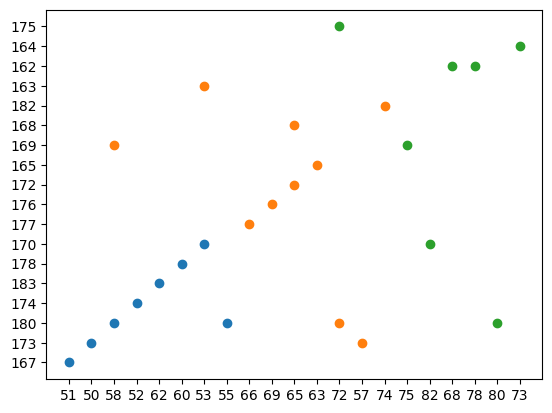

In [68]:
plt.scatter(u_df['Weight(x2)kg'],u_df['Height(y2)cm'])
plt.scatter(n_df['Weight(x2)kg'],n_df['Height(y2)cm'])
plt.scatter(o_df['Weight(x2)kg'],o_df['Height(y2)cm'])
plt.show()

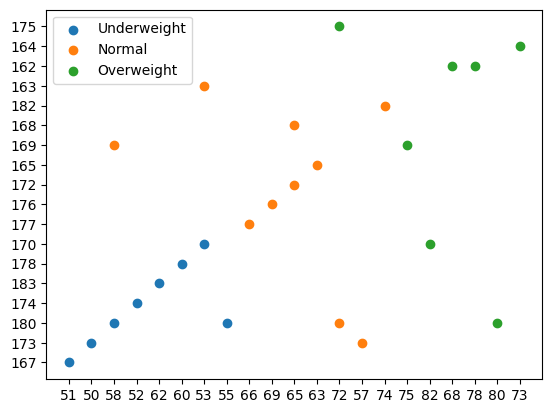

In [69]:
plt.scatter(u_df['Weight(x2)kg'],u_df['Height(y2)cm'],label=u[0])
plt.scatter(n_df['Weight(x2)kg'],n_df['Height(y2)cm'],label=u[1])
plt.scatter(o_df['Weight(x2)kg'],o_df['Height(y2)cm'],label=u[2])
plt.legend()
plt.show()

In [70]:
#call algorithm
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [71]:
x = df[['Weight(x2)kg','Height(y2)cm']]
y = df['Class']

In [72]:
#fit
clf.fit(x,y)

DecisionTreeClassifier(random_state=0)

In [73]:
#predict
clf.predict([[80,180]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Overweight'], dtype=object)

In [74]:
import joblib
joblib.dump(clf,'model_new')

['model_new']

In [75]:
!pip install streamlit

In [76]:
%%writefile app.py
import streamlit as st
import joblib
st.title("Underweight / Normal / Overweight Predictor")
weight = st.slider('What is your weight?', 0, 100, 25)
height = st.slider('What is your height?', 0, 200, 25)
model = joblib.load('model_new')
result = model.predict([[weight,height]])[0]

if st.button("Predict"):

  st.write(f"You are {result}")

Overwriting app.py


In [77]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] - fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.12.110:8501

npx: installed 22 in 2.464s
your url is: https://wide-phones-arrive.loca.lt
  Stopping...
^C
